In [48]:
import scipy.optimize as fitter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use("light_mode")

# Resolution Testing for Harmonic Coefficient Calculation

In [312]:
timing_df_3PCF = pd.read_csv("3PCF_timing_data.csv")
timing_df_4PCF = pd.read_csv("4PCF_timing_data.csv")
timing_df_3PCF_projected = pd.read_csv("3PCF_projected_timing_data.csv")
timing_df_4PCF_projected = pd.read_csv("4PCF_projected_timing_data.csv")


dts_3PCF, dts_4PCF, dts_3PCF_p, dts_4PCF_p = [], [], [], []

row_3PCF = timing_df_3PCF.loc(0)
row_4PCF = timing_df_4PCF.loc(0)
row_3PCF_p = timing_df_3PCF_projected.loc(0)
row_4PCF_p = timing_df_4PCF_projected.loc(0)

for i in range(len(timing_df_3PCF_projected['resolution'])):
    dts_3PCF_p.append(np.sum(row_3PCF_p[i][2:6]))
    dts_4PCF_p.append(np.sum(row_4PCF_p[i][2:6]))
    dts_3PCF.append(np.sum(row_3PCF[i][2:8]))
    dts_4PCF.append(np.sum(row_4PCF[i][2:8]))




In [313]:
timing_df_3PCF_projected

,Unnamed: 0,resolution,projected_create_bins,projected_create_kernels,calc_ft_data,projected_create_Cm_coeffs,calc_zeta
0,0,32,0.000900,0.013994,0.000136,0.006670,0.013432
1,1,48,0.001202,0.022738,0.000286,0.011728,0.019138
2,2,64,0.001278,0.033604,0.000594,0.017438,0.058462
3,3,96,0.001686,0.054422,0.000764,0.033110,0.095840
4,4,128,0.003246,0.083046,0.001164,0.049744,0.221520
5,5,160,0.004124,0.117020,0.002136,0.071914,0.350686
6,6,192,0.005934,0.159582,0.003572,0.102370,0.568448
7,7,224,0.006634,0.189376,0.003970,0.135642,0.794514
8,8,256,0.009678,0.251008,0.005080,0.186112,1.055966


In [314]:

dts_4PCF

[0.2506480000000004,
 0.5125099999999994,
 1.1096819999999994,
 3.2330560000000004,
 8.033095999999999,
 13.820891999999997,
 24.33945999999999,
 40.563880000000026,
 66.100806]

In [315]:
#we have to define our model with our needed parameters
def model_NlogN(x, a, b, c):
    return a * x*np.log(b*x) + c


def compute_best_fit(dts, NPCF, projected_flag):

    if NPCF == 3:
        if projected_flag:
            Ns = np.array(list(timing_df_3PCF_projected["resolution"] ** 2))
        else:
            Ns = np.array(list(timing_df_3PCF["resolution"] ** 3))
    elif NPCF == 4:
        if projected_flag:
            Ns = np.array(list(timing_df_4PCF_projected["resolution"] ** 2))
        else:
            Ns = np.array(list(timing_df_4PCF["resolution"] ** 3))

    par0    = np.array([1.0, 2.0, 1.0]) # initial guess for parameters
    par, cov = fitter.curve_fit(model_NlogN, Ns, dts, par0 ,maxfev=10000) #fitter.curve_fit takes in the model, x,y data, guess, and sigma
    
    ##################################################################

    # par arrays contains the values of parameters. cov is the covariance matrix
    # decode it now
    a = par[0]
    ea = np.sqrt(cov[0,0])
    print('a={0:6.8f}+/-{1:5.3f}'.format(a,ea))
    b = par[1]
    eb = np.sqrt(cov[1,1])
    print('b={0:6.3f}+/-{1:5.3f}'.format(b,eb))
    c = par[2]
    ec = np.sqrt(cov[2,2])
    print('c={0:6.3f}+/-{1:5.3f}'.format(c,ec))

    return [a,b,c], Ns

params_3pcf, Ns = compute_best_fit(dts_3PCF, 3, False)
params_4pcf, Ns = compute_best_fit(dts_4PCF, 4, False)
params_3pcf_proj, Ns_p = compute_best_fit(dts_3PCF_p, 3, True)
params_4pcf_proj, Ns_p = compute_best_fit(dts_4PCF_p, 4, True)

a=0.00000041+/-0.000
b= 0.000+/-0.001
c= 0.823+/-0.647
a=0.00000052+/-0.000
b= 0.000+/-0.000
c= 0.810+/-0.526
a=0.00000002+/-0.000
b=2963041879389455638127426513194691918739722962190598367549058732817568398164319939808591967848541599495941219796757404563669785165026062307151396833591296.000+/-  inf
c= 0.025+/-0.007
a=0.00000020+/-0.000
b=626026403.799+/-28613329277.072
c= 0.018+/-0.006


/Users/jamessunseri/.conda/envs/james/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [316]:
a1, b1,c1 = params_3pcf
a2,b2,c2 = params_4pcf
a3,b3,c3 = params_3pcf_proj
a4,b4,c4 = params_4pcf_proj

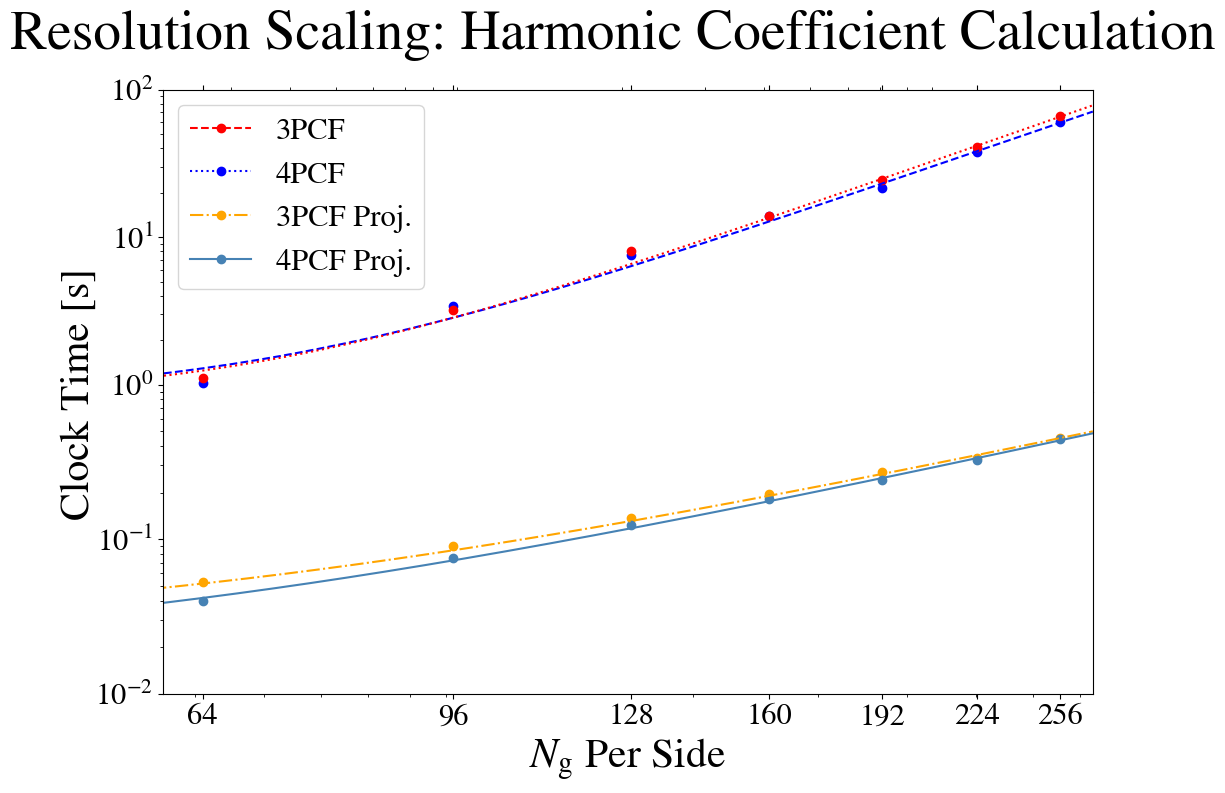

In [317]:

x_lin = np.linspace(30**3,270**3,1000)
x_lin_p = np.linspace(30**2,270**2,1000)
y_NlogN_3pcf = model_NlogN(x_lin, a1, b1,c1)
y_NlogN_4pcf = model_NlogN(x_lin, a2,b2,c2)
y_NlogN_3pcf_p = model_NlogN(x_lin_p, a3,b3,c3)
y_NlogN_4pcf_p = model_NlogN(x_lin_p, a4,b4,c4)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

fig.suptitle("Resolution Scaling: Harmonic Coefficient Calculation", fontsize=40)

#top plot
ax1.plot(Ns, dts_3PCF, 'bo')
ax1.plot(Ns, dts_4PCF, 'ro')
ax1.plot(x_lin,y_NlogN_3pcf, color='blue', linestyle='--')
ax1.plot(x_lin,y_NlogN_4pcf,color='red', linestyle=':')
ax1.loglog()
ax1.set_xticks(Ns)


ax1.plot([],[], color='red', marker="o", linestyle='--', label='3PCF')
ax1.plot([],[],color='blue',marker="o",  linestyle=':', label='4PCF')
ax1.plot([],[], color='orange', marker="o", linestyle='-.', label='3PCF Proj.')
ax1.plot([],[],color='steelblue',marker="o",  linestyle='-', label='4PCF Proj.')
ax1.set_xticklabels([])
ax1.set_xlim(60**3, 270**3)
ax1.set_ylim(0.90, 100)
ax1.legend()


ax2.scatter(Ns_p, dts_3PCF_p, color='orange', marker='o')
ax2.scatter(Ns_p, dts_4PCF_p, color='steelblue', marker='o')
ax2.plot(x_lin_p,y_NlogN_3pcf_p, color='orange', linestyle='-.', label='3PCF Proj.')
ax2.plot(x_lin_p,y_NlogN_4pcf_p,color='steelblue', linestyle='-', label='4PCF Proj.')
ax2.loglog()
ax2.set_ylim(0.01, 0.9)
ax2.set_xticks(Ns_p)
ax2.set_xticklabels([int(np.round(Ns_p[i]**(1/2))) for i in range(len(Ns_p))])
ax2.set_xlabel("$N_{\\mathrm{g}}$ Per Side", fontsize=30)
# ax2.set_ylabel("Clock Time [s]")
fig.text(0.04, 0.5, 'Clock Time [s]', va='center', rotation='vertical', fontsize=30)
# ax2.legend()

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax2.set_xlim(60**2, 270**2)

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("Resolution_Scaling_NLOGN.pdf")
plt.show()

# Resolution Scaling for `calc_zeta()`

In [306]:
timing_df_3PCF = pd.read_csv("3PCF_timing_data.csv")
timing_df_4PCF = pd.read_csv("4PCF_timing_data.csv")
timing_df_3PCF_projected = pd.read_csv("3PCF_projected_timing_data.csv")
timing_df_4PCF_projected = pd.read_csv("4PCF_projected_timing_data.csv")

In [ ]:
#we have to define our model with our needed parameters
def power_law(x, a, b):
    return a * x**b


def compute_best_fit_zeta(dts, NPCF, projected_flag):

    if NPCF == 3:
        if projected_flag:
            Ns = np.array(list(timing_df_3PCF_projected["resolution"] ** 2))
        else:
            Ns = np.array(list(timing_df_3PCF["resolution"] ** 3))
    elif NPCF == 4:
        if projected_flag:
            Ns = np.array(list(timing_df_4PCF_projected["resolution"] ** 2))
        else:
            Ns = np.array(list(timing_df_4PCF["resolution"] ** 3))

    par0    = np.array([1.0, 2.0]) # initial guess for parameters
    par, cov = fitter.curve_fit(power_law, Ns, dts, par0 ,maxfev=10000) #fitter.curve_fit takes in the model, x,y data, guess, and sigma
    
    ##################################################################

    # par arrays contains the values of parameters. cov is the covariance matrix
    # decode it now
    a = par[0]
    ea = np.sqrt(cov[0,0])
    print('a={0:6.8f}+/-{1:5.3f}'.format(a,ea))
    b = par[1]
    eb = np.sqrt(cov[1,1])
    print('b={0:6.3f}+/-{1:5.3f}'.format(b,eb))

    return [a,b], Ns

params_3pcf, Ns = compute_best_fit_zeta(timing_df_3PCF["calc_zeta"], 3, False)
params_4pcf, Ns = compute_best_fit_zeta(timing_df_4PCF["calc_zeta"], 4, False)
params_3pcf_proj, Ns_p = compute_best_fit_zeta(timing_df_3PCF_projected["calc_zeta"], 3, True)
params_4pcf_proj, Ns_p = compute_best_fit_zeta(timing_df_3PCF_projected["calc_zeta"], 4, True)

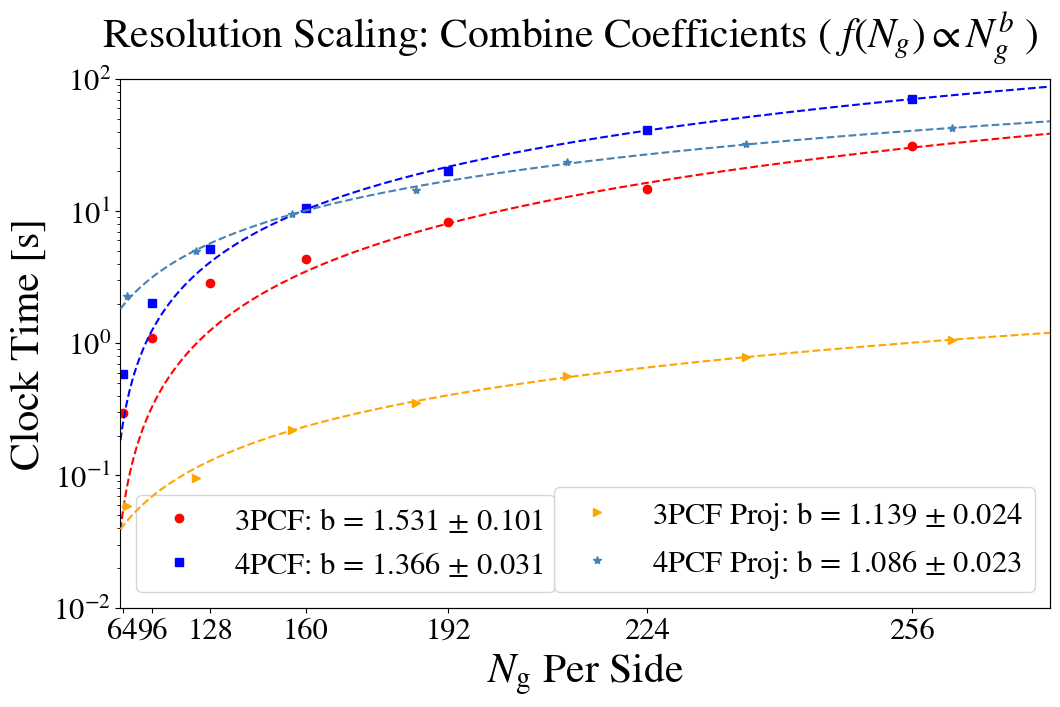

In [431]:
x_lin = np.linspace(60**3, 270**3, 1000)
x_lin_p = np.linspace(60**2, 270**2, 1000)


f, axes = plt.subplots(1,2, figsize=(12, 7))
f.suptitle("Resolution Scaling: Combine Coefficients ( $f(N_g) \propto N_g^b$ )", fontsize=30)

axes[0].plot(timing_df_3PCF["resolution"]**3,timing_df_3PCF["calc_zeta"], marker="o", color="red", linestyle=" ", 
label="3PCF: b = {0:0.3f} $\\pm$ {1:0.3f}".format(params_3pcf[1],params_3pcf[3]))
axes[0].plot(x_lin, power_law(x_lin, params_3pcf[0], params_3pcf[1]), color="red", linestyle="--")

axes[0].plot(timing_df_4PCF["resolution"]**3,timing_df_4PCF["calc_zeta"], marker="s", color="blue", linestyle=" ",
 label="4PCF: b = {0:0.3f} $\\pm$ {1:0.3f}".format(params_4pcf[1],params_4pcf[3]))
axes[0].plot(x_lin, power_law(x_lin, params_4pcf[0], params_4pcf[1]), color="blue", linestyle="--")

axes[0].semilogy()
axes[0].set_xticks(timing_df_3PCF_projected["resolution"]**3)
axes[0].set_xticklabels(timing_df_3PCF_projected["resolution"])
axes[0].set_xlim(60**3, 270**3)
axes[0].set_xlabel("$N_{\\mathrm{g}}$ Per Side", fontsize=30)
axes[0].set_ylabel('Clock Time [s]', fontsize=30)
axes[0].legend()

axes[1].plot(timing_df_3PCF_projected["resolution"]**2,timing_df_3PCF_projected["calc_zeta"],  marker=">", linestyle=" ", color="orange",
 label="3PCF Proj: b = {0:0.3f} $\\pm$ {1:0.3f}".format(params_3pcf_proj[1],params_3pcf_proj[3]))
axes[1].plot(x_lin_p, power_law(x_lin_p, params_3pcf_proj[0],params_3pcf_proj[1]), color="orange", linestyle="--")

axes[1].plot(timing_df_4PCF_projected["resolution"]**2,timing_df_4PCF_projected["calc_zeta"], marker="*", linestyle=" ", color="steelblue", 
label="4PCF Proj: b = {0:0.3f} $\\pm$ {1:0.3f}".format(params_4pcf_proj[1],params_4pcf_proj[3]))
axes[1].plot(x_lin_p, power_law(x_lin_p, params_4pcf_proj[0], params_4pcf_proj[1]), color="steelblue", linestyle="--")

axes[1].semilogy()
axes[1].set_xticks(timing_df_3PCF_projected["resolution"]**2)
axes[1].set_xticklabels(timing_df_3PCF_projected["resolution"])
axes[1].set_xlim(60**2, 270**2)
# axes[1].set_xlabel("$N_{\\mathrm{g}}$ Per Side", fontsize=30)
axes[1].legend(loc="best")
axes[1].patch.set_alpha(0.01)


axes[1].spines['left'].set_visible(False)
# axes[1].set_yticks([])
# axes[1].set_xticks([])
axes[1].tick_params(labelleft=False, labelbottom=False)  # don't put tick labels at the top

axes[1].xaxis.set_visible(False)
axes[1].yaxis.set_visible(False)
# axes[1].xaxis.tick_bottom()

axes[0].set_ylim(0.01, 100)
axes[1].set_ylim(0.01, 100)

# ax2.set_xlim(60**2, 270**2)
plt.subplots_adjust(wspace=-1, hspace=0)
# ax2.set_ylabel("Clock Time [s]")
# f.text(-0.02, 0.5, 'Clock Time [s]', va='center', rotation='vertical', fontsize=30)
# x_log = np.linspace(32**3, 256**3, 1000)
# axes.plot(x_log, ((x_log )**0.5) / 1000)

# f.tight_layout()
plt.savefig("Resolution_Scaling_calc_zeta_2.pdf")
plt.show()
